In [1]:
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from linearmodels import PanelOLS

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,team,player,position,tour,place,prize,start,end,startelo32,startelo64,...,endelo32,endelo64,endglickorating,endglickomu,endglickophi,endglickosigma,endglicko2rating,endglicko2mu,endglicko2phi,endglicko2sigma
0,Infamous,Kotar? Hayama,1,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
1,Infamous,Papita,2,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
2,Infamous,StingeR,3,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
3,Infamous,Scofield,4,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
4,Infamous,Masoku,5,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN


In [4]:
df['prize'] = df['prize'].replace('[\$,]', '', regex=True).astype(float)
df.player = df.player.replace(r'\W+', '', regex=True).str.lower()
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
print(df.dtypes)
df.head()

team                          object
player                        object
position                       int64
tour                          object
place                          int64
prize                        float64
start                 datetime64[ns]
end                   datetime64[ns]
startelo32                   float64
startelo64                   float64
startglickorating            float64
startglickomu                float64
startglickophi               float64
startglickosigma             float64
startglicko2rating           float64
startglicko2mu               float64
startglicko2phi              float64
startglicko2sigma            float64
endelo32                     float64
endelo64                     float64
endglickorating              float64
endglickomu                  float64
endglickophi                 float64
endglickosigma               float64
endglicko2rating             float64
endglicko2mu                 float64
endglicko2phi                float64
e

,team,player,position,tour,place,prize,start,end,startelo32,startelo64,...,endelo32,endelo64,endglickorating,endglickomu,endglickophi,endglickosigma,endglicko2rating,endglicko2mu,endglicko2phi,endglicko2sigma
0,Infamous,kotarhayama,1,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
1,Infamous,papita,2,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
2,Infamous,stinger,3,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
3,Infamous,scofield,4,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
4,Infamous,masoku,5,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN


In [5]:
pool = df.groupby(['start', 'team']).first()[['prize', 'tour']].groupby('tour').sum().reset_index().rename(columns={'prize': 'pool'})
pool.head()

,tour,pool
0,2013 WPC ACE Dota 2 League,254534.0
1,2015 Red Bull Battle Grounds: Dota 2,88295.0
2,AMD Premier League Season 1,6500.0
3,AMD Premier League Season 2,7000.0
4,AMD SAPPHIRE Dota PIT League,300000.0


In [6]:
df = pd.merge(df, pool, how='left', on=['tour'])

In [7]:
df2 = pd.read_csv('dob.csv', encoding = "ISO-8859-1")
df2.head()

,country,player,name,dob
0,Russia,.Ark,Egor Zhabotinskii,1997-07-07
1,Denmark,13abyKnight,Jon Andersen,1992-06-15
2,Canada,1437,Sivatheeban Sivanathapillai,NaN
3,China,290,Zeng Chen,NaN
4,United Kingdom,2GD,James Harding,1982-12-29


In [8]:
df2.player = df2.player.replace(r'\W+', '', regex=True).str.lower()
df2.dob = pd.to_datetime(df2.dob)
print(df2.dtypes)
df2.head()

country            object
player             object
name               object
dob        datetime64[ns]
dtype: object


,country,player,name,dob
0,Russia,ark,Egor Zhabotinskii,1997-07-07
1,Denmark,13abyknight,Jon Andersen,1992-06-15
2,Canada,1437,Sivatheeban Sivanathapillai,NaT
3,China,290,Zeng Chen,NaT
4,United Kingdom,2gd,James Harding,1982-12-29


In [9]:
df = pd.merge(df, df2, how='left', on=['player'])

In [10]:
ra = df[['team', 'player', 'dob', 'position', 'tour', 'place', 'prize', 'pool', 'start', 'end', 'startelo64', 'endelo64']]
print(len(ra))
print(len(ra.dropna()))
ra = ra.dropna().sort_values('start').reset_index().drop('index', axis=1)

9240
4717


In [11]:
ra = ra.rename(columns={'startelo64': 'srt', 'endelo64': 'ert'})
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795


In [12]:
ra['age'] = (ra.start - ra.dob).dt.days

In [13]:
for player in ra.player.unique():
    try:
        dfid = pd.DataFrame(ra[ra['player'] == player].tour.unique()).reset_index().rename(columns={'index': 'exp', 0: 'tour'})
        dfid['player'] = player
        dfid2 = pd.concat([dfid2, dfid])
    except NameError:
        dfid2 = dfid
        continue

In [14]:
ra = pd.merge(ra, dfid2, how='left', on=['player', 'tour'])

In [15]:
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert,age,exp
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,7242,0
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,7524,0
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,7281,0
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,7714,0
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,9044,0


In [16]:
ti = ra[ra['tour'].str[:17] == 'The International'].groupby('tour').first()[['pool', 'start', 'end']]
ti

,pool,start,end
tour,,,
The International 2012,1775000.0,2012-08-26,2012-09-02
The International 2013,3219309.0,2013-08-02,2013-08-11
The International 2014,10967674.0,2014-07-08,2014-07-21
The International 2015,17600281.0,2015-07-27,2015-08-08
The International 2016,13916298.0,2016-08-02,2016-08-13
The International 2017,24687919.0,2017-08-02,2017-08-12


In [17]:
ra['weight'] = ra['pool']
for i in range(0, 5):
    ra.loc[(ra['start'] >= ti['start'].iloc[i]) & (ra['start'] <= ti['start'].iloc[i+1]), 'weight'] = ra[(ra['start'] >= ti['start'].iloc[i]) & (ra['start'] <= ti['start'].iloc[i+1])]['pool'].apply(np.log) / np.log(ti['pool'].iloc[i])

#Only before ti7
ra = ra[ra['start'] < ti['start'].iloc[5]]

In [18]:
init = ra.sort_values('start').groupby('player').first()['srt'].reset_index().rename(columns={'srt': 'init'})
init.head()

,player,init
0,,1006.800604
1,33,1013.682296
2,4dr,924.234998
3,7ckngmad,1022.550958
4,9pasha,1315.094989


In [19]:
ra = pd.merge(ra, init, how='left', on=['player'])

In [20]:
ra['drt'] = ra.ert - ra.srt
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert,age,exp,weight,init,drt
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,7242,0,1.0,1054.248131,-199.921189
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,7524,0,1.0,1054.248131,-199.921189
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,7281,0,1.0,1269.147739,-311.672944
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,7714,0,1.0,1269.147739,-311.672944
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,9044,0,1.0,1269.147739,-311.672944


In [21]:
cumsums = ra[['player', 'start', 'drt']].groupby(['player', 'start']).sum().groupby(level=0).cumsum()
ra = ra.set_index(['player', 'start'])
ra['cumrt'] = cumsums
ra = ra.reset_index()
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,ert,age,exp,weight,init,drt,cumrt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,7242,0,1.0,1054.248131,-199.921189,-199.921189
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,7524,0,1.0,1054.248131,-199.921189,-199.921189
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,7281,0,1.0,1269.147739,-311.672944,-311.672944
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,7714,0,1.0,1269.147739,-311.672944,-311.672944
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,9044,0,1.0,1269.147739,-311.672944,-311.672944


In [22]:
ra['crt'] = (ra.weight * ra.cumrt) + ra.init
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,ert,age,exp,weight,init,drt,cumrt,crt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,7242,0,1.0,1054.248131,-199.921189,-199.921189,854.326942
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,7524,0,1.0,1054.248131,-199.921189,-199.921189,854.326942
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,7281,0,1.0,1269.147739,-311.672944,-311.672944,957.474795
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,7714,0,1.0,1269.147739,-311.672944,-311.672944,957.474795
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,9044,0,1.0,1269.147739,-311.672944,-311.672944,957.474795


In [23]:
ra = ra.drop(['ert', 'init', 'drt', 'cumrt'], axis=1)
ra.tail()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,age,exp,weight,crt
4245,kuroky,2017-07-21,Team Liquid,1992-10-28,5,DreamLeague Season 7,1,80000.0,175000.0,2017-07-22,1351.383298,9032,59,0.733957,1258.398246
4246,alohadance,2017-07-21,Vega Squadron,1997-09-15,1,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,1028.784996,7249,23,0.733957,1281.273997
4247,g,2017-07-21,Vega Squadron,1992-04-16,2,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,1028.784996,9227,19,0.733957,1098.113645
4248,afterlife,2017-07-21,Vega Squadron,1997-03-13,3,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,1028.784996,7435,11,0.733957,1084.259969
4249,matumbaman,2017-07-21,Team Liquid,1995-03-03,1,DreamLeague Season 7,1,80000.0,175000.0,2017-07-22,1351.383298,8176,19,0.733957,1452.481802


In [24]:
ra[['player', 'team', 'srt', 'end']].groupby('player').max().sort_values('srt', ascending=False)

,team,srt,end
player,,,
super,Vici Gaming,1536.900227,2017-07-09
fy,Vici Gaming,1536.900227,2017-07-09
rotk,Vici Gaming,1536.900227,2017-06-18
sylar,Vici Gaming,1536.900227,2016-12-31
fenrir,Vici Gaming,1536.900227,2017-06-18
miracle,Team Liquid,1508.707059,2017-07-22
cr1t,OG,1508.707059,2017-07-09
fly,OG,1508.707059,2017-07-09
moonmeander,OG,1508.707059,2017-02-26


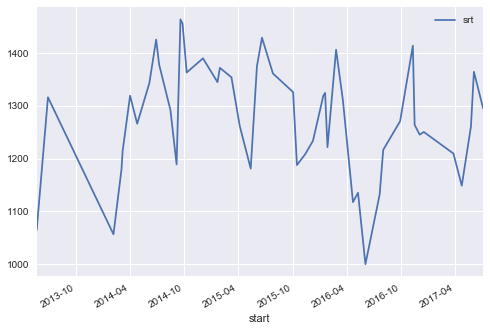

In [25]:
ra[ra['player'] == 'arteezy'][['start', 'srt']].set_index('start').plot()

In [26]:
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,age,exp,weight,crt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,7242,0,1.0,854.326942
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,7524,0,1.0,854.326942
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,7281,0,1.0,957.474795
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,7714,0,1.0,957.474795
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,9044,0,1.0,957.474795


In [27]:
ra.reset_index().head()

,index,player,start,team,dob,position,tour,place,prize,pool,end,srt,age,exp,weight,crt
0,0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,7242,0,1.0,854.326942
1,1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,7524,0,1.0,854.326942
2,2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,7281,0,1.0,957.474795
3,3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,7714,0,1.0,957.474795
4,4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,9044,0,1.0,957.474795


In [28]:
ra = ra.reset_index().drop_duplicates(subset=['start', 'player'])

In [29]:
ra = ra[ra['player'] != '']
ra = ra[(ra['age'] > 6570) & (ra['age'] < 10220)]

In [30]:
ra = pd.merge(ra, ra.groupby('player').size().reset_index().reset_index().drop(0,axis=1).rename(columns={'index': 'id'}), how='left', on=['player'])

In [31]:
#analysis
ra = ra.set_index(['id', 'start']).sort_index()
ra['age2'] = ra.age ** 2
ra['age3'] = ra.age ** 3
ra['exp2'] = ra.exp ** 2
ra['exp3'] = ra.exp ** 3
ra['lexp'] = np.add(ra.exp, 1).apply(np.log)

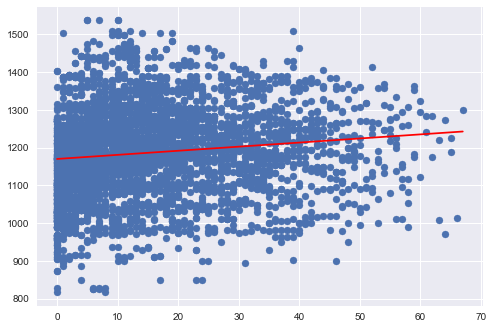

In [55]:
y = ra['srt']
x = ra['exp']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r')

In [33]:
ra['const'] = 1

In [35]:
#core vs sup
cor = ra[ra['position'] <= 3]
sup = ra[ra['position'] > 3]

In [45]:
cor.head()

index player            team        dob  position  \
id start                                                           
0  2016-12-14   3721     33  Prodota Gaming 1997-04-17         2   
   2017-05-02   3985     33  Prodota Gaming 1997-04-17         3   
1  2015-11-28   2495    4dr     PaiN Gaming 1993-07-13         1   
   2017-04-24   3916    4dr     SG e-sports 1993-07-13         2   
   2017-05-30   4078    4dr     SG e-sports 1993-07-13         2   

                                           tour  place     prize       pool  \
id start                                                                      
0  2016-12-14            World Cyber Arena 2016      4   28744.0   732972.0   
   2017-05-02       Mr. Cat Invitational Europe      4    5000.0    70000.0   
1  2015-11-28        Dota 2 Canada Cup Season 6      3    4076.0    93751.0   
   2017-04-24               The Kiev Major 2017      5  125000.0  3000000.0   
   2017-05-30  DreamLeague Season 7 NA Division      4    1000.0    12000.0   

                     end  ...     age  exp    weight          crt      age2  \
id start                  ...                                                 
0  2016-12-14 2016-12-16  ...    7181    0  0.821036   999.974471  51566761   
   2017-05-02 2017-05-18  ...    7320    1  0.678250  1026.367702  53582400   
1  2015-11-28 2016-02-08  ...    8173    0  0.686214   900.438705  66797929   
   2017-04-24 2017-04-30  ...    8686    1  0.906712   936.100954  75446596   
   2017-05-30 2017-05-31  ...    8722    2  0.571032   931.489252  76073284   

                       age3  exp2  exp3      lexp  const  
id start                                                  
0  2016-12-14  370300910741     0     0  0.000000      1  
   2017-05-02  392223168000     1     1  0.693147      1  
1  2015-11-28  545939473717     0     0  0.000000      1  
   2017-04-24  655329132856     1     1  0.693147      1  
   2017-05-30  663511183048     4     8  1.098612      1  

[5 rows x 21 columns]

In [53]:
#CORE
y1 = cor['srt']
x1 = cor[['age', 'lexp']]
mod = PanelOLS(y1, x1, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res.summary

Dep. Variable:,srt,R-squared:,0.0335
Estimator:,PanelOLS,R-squared (Between):,-1.7659
No. Observations:,2313,R-squared (Within):,0.0335
Date:,"Sun, Jan 28 2018",R-squared (Overall):,-1.6380
Time:,12:55:01,Log-likelihood,-1.399e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,36.779
Entities:,254,P-value,0.0000
Avg Obs:,9.1063,Distribution:,"F(2,2122)"
Min Obs:,0.0000,,
Max Obs:,60.000,F-statistic (robust):,14.271


In [50]:
#SUPP
y1 = sup['srt']
x1 = sup[['age', 'lexp']]
mod = PanelOLS(y1, x1, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res.summary

Dep. Variable:,srt,R-squared:,0.0366
Estimator:,PanelOLS,R-squared (Between):,-1.8011
No. Observations:,1619,R-squared (Within):,0.0366
Date:,"Sun, Jan 28 2018",R-squared (Overall):,-1.6194
Time:,12:53:00,Log-likelihood,-9751.1
Cov. Estimator:,Clustered,,
,,F-statistic:,28.030
Entities:,255,P-value,0.0000
Avg Obs:,6.3490,Distribution:,"F(2,1476)"
Min Obs:,0.0000,,
Max Obs:,63.000,F-statistic (robust):,10.338
